#### In this first section, we will define the behaviour of the fire propagation as modeled mathematically in the presentation. We will then visualize this propagation using adequate tools and libraries.

This first cell describes the behaviour of the fire propagation

In [41]:
#necessary imports
import random

#define a random forest
def random_forest(n,p):
    forest = [[0]*n for i in range(n)]
    for i in range(n):
        for j in range(n):
            x = random.uniform(0,1)
            if x<=p :
                forest[i][j] = 1
    return forest

#count number of trees
def number_of_trees(forest,n):
    counter=0
    for i in range(n):
        for j in range(n):
            if forest[i][j]==1:
                counter+=1
    return counter


#define neighbours of a tree cell
def neighbors(n, i, j):
    return [(a, b) for (a, b) in [(i - 1, j), (i + 1, j), (i, j - 1), (i, j + 1)] if a in range(n) and b in range(n)]


#define the behaviour of propagation that should happen in each step
def step_propagate(forest,n):
    counter = 0
    for i in range(n):
        for j in range(n):
            if forest[i][j]==2:
                for (a,b) in neighbors(n,i,j):
                    if forest[a][b]==1:
                        forest[a][b]=2
                        counter+=1
                forest[i][j]=3
    return counter

#propagate fire
def propagate(forest,number_of_trees,rate,n):
    counter = step_propagate(forest,n)
    rate+=counter/number_of_trees
    if counter != 0:
        return propagate(forest,number_of_trees,rate,n)
    return rate
    



This next cell is for defining the logic of the visualization

In [42]:
#necessary imports
from tkinter import Tk, Canvas, Label


#colors choice
COLORS=["ivory","green","yellow","crimson"]

#parameters
p=0.65
n=200
unit=3

#window and canvas
root= Tk()

cnv = Canvas(root,width=unit*n,height=unit*n,background="ivory")
cnv.pack(side="left")




#fill a cell with the appropriate color
def fill_cell(forest, i, j) :
    A=(unit*j,unit*i)
    B=(unit*(j+1),unit*(i+1))
    cell=forest[i][j]
    color=COLORS[cell]
    cnv.create_rectangle(A, B, fill=color, outline='')

#fill all cells
def fill(forest) :
    n=len(forest)
    for i in range(n) :
        for j in range(n) :
            fill_cell(forest,i,j)


#propagate fire + visualization
def propagate_visualize(forest,number_of_trees,taux):
    counter = step_propagate(forest,n)
    taux+=counter/number_of_trees
    if counter != 0:
        cnv.delete("all")
        fill(forest)
        root.after(150, propagate_visualize, forest, number_of_trees,taux)
    
    



And this last one is for starting the visualization

In [43]:
#random forest
forest=random_forest(n,p)
number_of_trees=number_of_trees(forest,n)

#trigger the fire in the middle
i=n//2
j=n//2
forest[i][j]=2
taux=0

#visualization
fill(forest)
propagate_visualize(forest,number_of_trees,taux)



root.mainloop()

#### In this second section, the purpose is to approximate the critical threshold Pc as described in the presentation, through the determination of the values of θ(p) for different values of p and for different sizes of the forest ( which idealy should be of an infinite size ). We then will plot the results, and use the intersection point as the approximate value of Pc.

This cell is for determining the values of θ(p) for different values of p and n

In [ ]:
#necessary imports
import numpy as np

def percolate(forest,n):


    # Check if there is a percolating cluster
    visited = [[False] * n for _ in range(n)]
    stack = []
    percolates = False

    # Perform depth-first search (DFS)
    for i in range(n):
        if forest[i][0] == 1 and not visited[i][0]:
            stack.append((i, 0))
            visited[i][0] = True

            while stack:
                x, y = stack.pop()

                if y == n - 1:
                    percolates = True
                    break

                neighbors = [(x - 1, y), (x + 1, y), (x, y - 1), (x, y + 1)]
                for nx, ny in neighbors:
                    if 0 <= nx < n and 0 <= ny < n and forest[nx][ny] == 1 and not visited[nx][ny]:
                        stack.append((nx, ny))
                        visited[nx][ny] = True

            if percolates:
                break

    return percolates


#parameters
P = np.linspace(0.58, 0.6, 10)
N=[50,100,150,200]


for n in N:
    for p in P: 

        X=[0 for k in range(100)]
        S = 0

        for k in range(100):

            #random forest (should I change the forest in each iteration ??? Yes definitely !)
            forest=random_forest(n,p)
            number=number_of_trees(forest,n)

            #trigger the fire in the middle 
            i=n//2
            j=n//2
            forest[i][j]=2
            rate=0
  
            if percolate(forest,n):
                X[k]=1
                S+=X[k]/100

        print(f"for n={n} and p={p} : S={S}")






In [ ]:
#after executing this cell, restart the kernel and re-open the file
%pip install scipy

This part is for plotting the curves representing θ(p) to approximate Pc

C:\Users\lenovo\AppData\Local\Temp\ipykernel_18168\1739685904.py:44: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color = plt.cm.get_cmap('tab10')(N.index(n) / len(N))  # Get color based on index of n


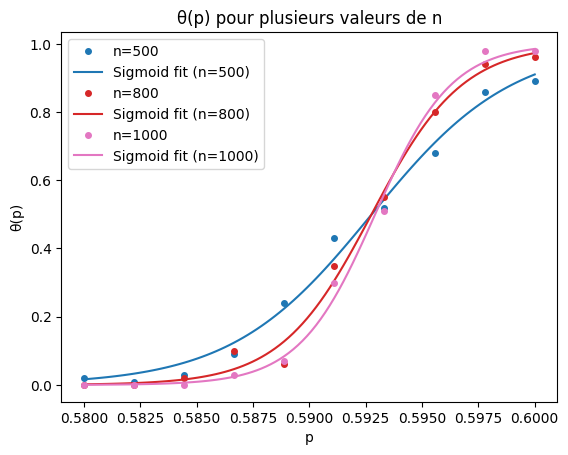

In [6]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Sigmoid function
def sigmoid(x, a, b):
    return 1 / (1 + np.exp(-a * (x - b)))

P = np.linspace(0.58, 0.6, 10)
N = [500,800,1000]

for n in N:
    S_values = []  # List to store S values for each p

    for p in P:
        X = [0 for k in range(100)]
        S = 0

        for k in range(100):
            forest = random_forest(n, p)
            number = number_of_trees(forest, n)
            i = n // 2
            j = n // 2
            forest[i][j] = 2
            rate = 0

            if percolate(forest,n):
                X[k] = 1
                S += X[k] / 100

        S_values.append(S)

    # Convert P and S_values to numpy arrays
    P_array = np.array(P)
    S_array = np.array(S_values)

    # Fit sigmoid function to the data
    popt, pcov = curve_fit(sigmoid, P_array, S_array)

    # Generate smooth x-values for the curve
    x_smooth = np.linspace(min(P_array), max(P_array), 100)

    # Plot the curve for the current value of n
    color = plt.cm.get_cmap('tab10')(N.index(n) / len(N))  # Get color based on index of n
    plt.plot(P_array, S_array, 'o', markersize=4, color=color, label=f"n={n}")
    plt.plot(x_smooth, sigmoid(x_smooth, *popt), color=color, label=f"Sigmoid fit (n={n})")

# Set the plot labels and title
plt.xlabel('p')
plt.ylabel('θ(p)')
plt.title('θ(p) pour plusieurs valeurs de n')

# Add a legend
plt.legend()

# Show the plot
plt.show()

#### In this final section, We will visualize the proposed solution : a protective layer. We then will mesure the relevance of this solution by optimizing the solution parameters.

For visualizing the solution

In [28]:
#necessary imports
import random
import itertools as it

#simulate a cluster of houses surrounded with trees
def random_forest(n,p,m):
    forest = [[1]*n for i in range(n)]

    for i in it.chain(range(0, (5-m)*n//12), range((7+m)*n//12,n)):
        for j in range(0,n):
            x = random.uniform(0,1)
            if x<=0.8 :
                forest[i][j] = 1
            else :
                forest[i][j]=0

    for i in range((5-m)*n//12,(7+m)*n//12):
        for j in it.chain(range(0, (5-m)*n//12), range((7+m)*n//12,n)):
            x = random.uniform(0,1)
            if x<=0.8 :
                forest[i][j] = 1
            else :
                forest[i][j]=0
    
    
    for i in range((5-m)*n//12,(7+m)*n//12):
        for j in range((5-m)*n//12,(7+m)*n//12):
            x = random.uniform(0,1)
            if x<=p :
                forest[i][j] = 1
            else :
                forest[i][j]=0
                
    for i in range(5*n//12,(5*n//12)+3*((7*n//12)-(5*n//12))//5):
        for j in range(5*n//12,7*n//12):
            forest[i][j]=4

    for i in range((5*n//12)+3*((7*n//12)-(5*n//12))//5,7*n//12):
        for j in range((5*n//12)+2*((7*n//12)-(5*n//12))//5,7*n//12):
            forest[i][j]=4
    return forest


#define neighbours of a tree cell
def neighbors(n, i, j):
    
    return [(a, b) for (a, b) in [(i - 1, j), (i + 1, j), (i, j - 1), (i, j + 1)] if a in range(n) and b in range(n)]


#define the behaviour of propagation that should happen in each step
def step_propagate(forest,n):
    counter = 0
    isBurned = False
    for i in range(n):
        for j in range(n):
            if forest[i][j]==2:
                for (a,b) in neighbors(n,i,j):
                    if forest[a][b]==1:
                        forest[a][b]=2
                        counter+=1
                    if forest[a][b]==4:
                        forest[a][b]=5
                forest[i][j]=3
            if forest[i][j]==5:
                for (a,b) in neighbors(n,i,j):
                    if forest[a][b]==4:
                        forest[a][b]=5

    return counter

#propagate fire
def propagate(forest,n):
    counter = step_propagate(forest,n)
    if counter != 0 and counter != -1:
        return propagate(forest,n)
    return counter

this cell will be used later to mesure the solution

In [3]:
#necessary imports
import random
import itertools as it

#simulate a cluster of houses surrounded with trees
def random_forest(n,p,m):
    forest = [[1]*n for i in range(n)]

    for i in it.chain(range(0, (10-m)*n//24), range((14+m)*n//24,n)):
        for j in range(0,n):
            x = random.uniform(0,1)
            if x<=0.8 :
                forest[i][j] = 1
            else :
                forest[i][j]=0

    for i in range((10-m)*n//24,(14+m)*n//24):
        for j in it.chain(range(0, (10-m)*n//24), range((14+m)*n//24,n)):
            x = random.uniform(0,1)
            if x<=0.8 :
                forest[i][j] = 1
            else :
                forest[i][j]=0
    
    
    for i in range((10-m)*n//24,(14+m)*n//24):
        for j in range((10-m)*n//24,(14+m)*n//24):
            x = random.uniform(0,1)
            if x<=p :
                forest[i][j] = 1
            else :
                forest[i][j]=0
                
    for i in range(10*n//24,14*n//24):
        for j in range(10*n//24,14*n//24):
            forest[i][j]=4
    return forest


#define neighbours of a tree cell
def neighbors(n, i, j):
    
    return [(a, b) for (a, b) in [(i - 1, j), (i + 1, j), (i, j - 1), (i, j + 1)] if a in range(n) and b in range(n)]


#define the behaviour of propagation that should happen in each step
def step_propagate(forest,n):
    counter = 0
    isBurned = False
    for i in range(n):
        for j in range(n):
            if forest[i][j]==2:
                
                for (a,b) in neighbors(n,i,j):
                    if forest[a][b]==1:
                        forest[a][b]=2
                        counter+=1
                    if forest[a][b]==4:
                        return -1
     
                forest[i][j]=3


    return counter

#propagate fire
def propagate(forest,n):
    counter = step_propagate(forest,n)
    if counter != 0 and counter != -1:
        return propagate(forest,n)
    return counter



    

For defining the logic of the visualization another time

In [33]:
#necessary imports
from tkinter import Tk, Canvas, Label


#colors choice
COLORS=["ivory","green","yellow","crimson","black","grey"]

#parameters
p=0.4
m=2
n=200
unit=4

#window and canvas
root= Tk()

cnv = Canvas(root,width=unit*n,height=unit*n,background="ivory")
cnv.pack(side="left")




#fill a cell with the appropriate color
def fill_cell(forest, i, j) :
    A=(unit*j,unit*i)
    B=(unit*(j+1),unit*(i+1))
    cell=forest[i][j]
    color=COLORS[cell]
    cnv.create_rectangle(A, B, fill=color, outline='')

#fill all cells
def fill(forest) :
    n=len(forest)
    for i in range(n) :
        for j in range(n) :
            fill_cell(forest,i,j)


#propagate fire + visualization
def propagate_visualize(forest,n):
    counter = step_propagate(forest,n)
    print(counter)
    if counter != 0 and counter != -1:
        cnv.delete("all")
        fill(forest)
        root.after(150, propagate_visualize, forest,n)

For starting the visualization

In [34]:
#random forest
forest=random_forest(n,p,m)


#trigger the fire
i=4
j=4
forest[i][j]=2

#visualization
fill(forest)



root.mainloop()

This cell is for calculating q for different values of p and m ( q being the risk of fire )

In [ ]:
#necessary imports
import numpy as np

#parameters
P = np.linspace(0.2, 0.58, 10)
M = [1,2,3,4,5,6,7,8,9]


for m in M:
    for p in P: 

        X=[0 for k in range(100)]
        Q = 0

        for k in range(100):

            forest=random_forest(n,p,m)

            #trigger the fire
            i=4
            j=4
            forest[i][j]=2
  
            if propagate(forest,n)==-1:
                X[k]=1
                Q+=X[k]/100

        print(f"for m={m} and p={p} : Q={Q}")

This next cell if for plotting q as a 2D function of p and m

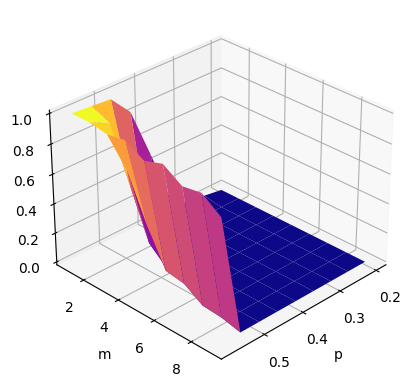

In [4]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

n=200

# The two-dimensional domain of the fit.

P = np.linspace(0.2, 0.58, 9)
M = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
M_reshaped = M.reshape(-1, 1)
X, Y = np.meshgrid(P, M_reshaped)


Q = np.zeros((9,9))

for i, m in enumerate(M):
    for j, p in enumerate(P): 

        Xs=[0 for k in range(100)]
        Q_value = 0

        for k in range(100):

            forest=random_forest(n,p,m)

            #trigger the fire in the middle 
            i1=4
            j1=4
            forest[i1][j1]=2
  
            if propagate(forest,n)==-1:
                Xs[k]=1
                Q_value+=Xs[k]/100

        Q[i,j]=Q_value  

# Plot the 3D figure of the fitted function and the residuals.
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Q, cmap='plasma')
ax.set_zlim(0,1)

# Label the axes
ax.set_xlabel('p')
ax.set_ylabel('m')
ax.set_zlabel('α')

# Adjust the point of view
ax.view_init(elev=30, azim=45)

plt.show() 


This final cell if for plotting a curve representing tuples (p,m) for a fixed risk of 5%

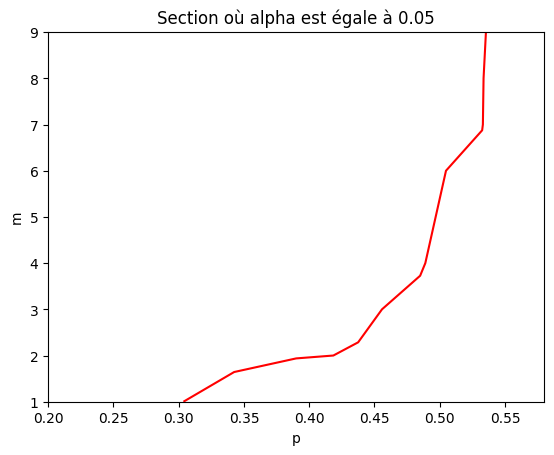

In [15]:
# Set the desired value of Q to extract the section
fixed_Q = 0.05

# Create a contour plot of the section where Q is equal to fixed_Q
plt.contour(X, Y, Q, levels=[fixed_Q], colors='r')

# Set the axis labels and title
plt.xlabel('p')
plt.ylabel('m')
plt.title('Section où alpha est égale à {}'.format(fixed_Q))

# Show the plot
plt.show()